# Exploratory Data Analysis - Habermans data

   Habermans data - Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital        between year 1958 to 1970 for the patients who undergone surgery of breast cancer.
   
   Dataset reference : https://www.kaggle.com/gilsousa/habermans-survival-data-set

# Assignment Problems:

* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.set()

In [2]:
hb = pd.read_csv('haberman.csv',names=['age', 'operation year', 'axillary nodes', 'status'])
hb

,age,operation year,axillary nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


There are 4 attribute in this data set out of which 3 are features and 1 label as below. Also, there are 306 data points.

1. [age]   -  Age of patient at time of operation (numerical)
2. [operation year]  -  Patient's year of operation(numerical) {64 here means 1964..& so on}
3. [axillary nodes] -  Number of positive Axillary nodes(Lymph Nodes)
4. [status]-  Survival status( 1 = the patient survived 5 years or longer / 2 = the patient died within 5 year )

In [3]:
print('SHAPE=',hb.shape)
print('Columns in the DataFrame=',hb.columns)

SHAPE= (306, 4)
Columns in the DataFrame= Index(['age', 'operation year', 'axillary nodes', 'status'], dtype='object')


We have 306 data points

It has 3 features(age,operation year,axillary nodes) & one class label (status)

In [4]:
hb['status'].value_counts()/hb.shape[0]

1    0.735294
2    0.264706
Name: status, dtype: float64

In [5]:
#to find the no of data points corresponding to each status
hb["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

* The habermans dataset is an imbalanced type of dataset,i.e the data points per class lael are not equal.
* 225 people could survive for more than 5 years(approx 74%) & 81 died within 5 years(approx 26%). 
* Also we have less no of people that couldn't survive

In [6]:
hb.describe()

,age,operation year,axillary nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* In the data set we have the mean is 52 ,indicates this the average age to have the cancer surgery for patients.
* Also in ref. to the standard deviation of 10 means at age 40-60 people are more at risk of breast cancer.
* Also 50 % people range in age group 44-60(IQR 25-75)
* The data is collected from people operated in 1958 - 1969 & of age group 30 - 83 years.

## Objective

Our objective here whould be to analyse for the best features that could be considered for any classification.
Further this could be used to train any model to classify for 'survived' or 'not-survived'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


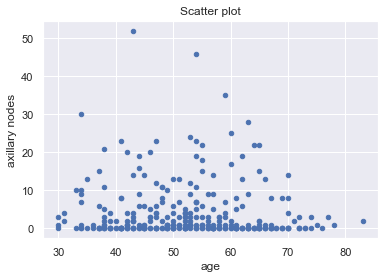

In [9]:
hb.plot(kind='scatter',x= 'age',y='axillary nodes')
plt.title('Scatter plot')
plt.show()

It's seen that the majority of the people operated have less than 10 nodes & also directly based on the above plot we can't even reach to any rough conclusions.

# Pair plot
   From pair plot for the features we'll be able to determine the best available features for bivariate analysis

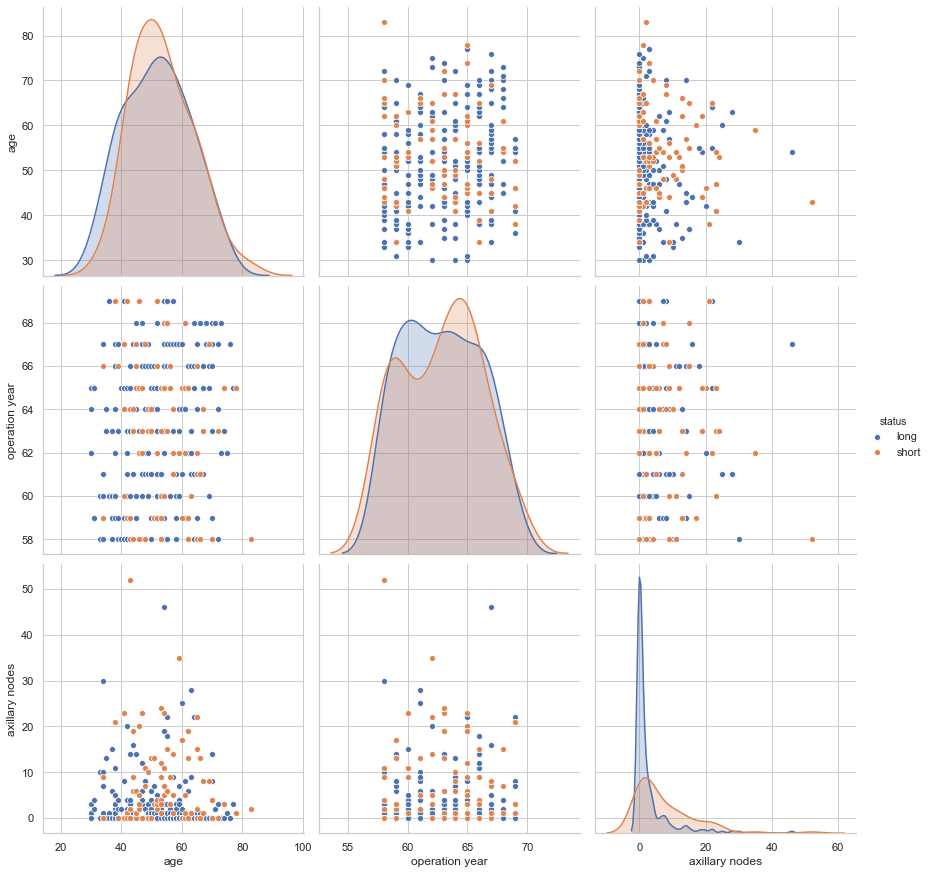

In [25]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", height=4);
plt.show()
pd.set_option('display.max_rows', 500)

* Here it seems that only the plots 3 & 7 i.e the plots between age & nodes are easily distinguishable for the scatter plots,so these would be our best choice of features for the further analysis.
* The rest of the plots have majority of the overlapping points

## 2-D Scatter Plots

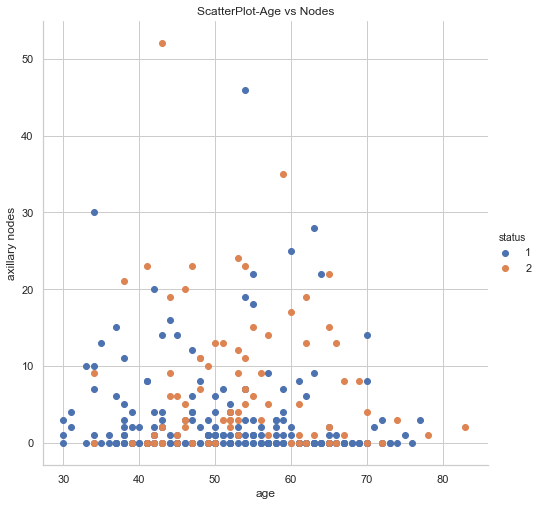

In [11]:
# 2-D Scatter plot with color-coding for each status.
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", height = 7) \
   .map(plt.scatter,  "age", "axillary nodes") \
   .add_legend();
plt.title('ScatterPlot-Age vs Nodes')
plt.show();

* An assumption can be made that those patients with 0 nodes are more likely to survive & majority of the patients have less than 10 nodes.
* It's quite rare for a patient to have more than 30 nodes
* Patients in age group 30 to 40 are more likely to survive

### Plotting when we only have a single variable

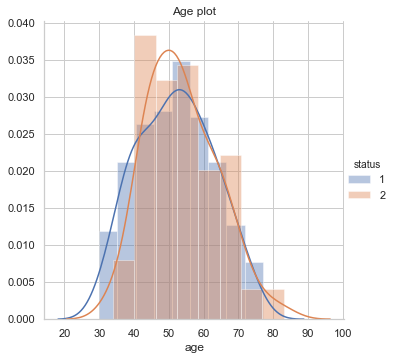

In [13]:
sns.FacetGrid(hb,hue="status",height = 5)\
    .map(sns.distplot,"age")\
    .add_legend()
plt.title('Age plot')
plt.show();

* We can see that max no of people diagnosed are in age group 40 to 65 & that's somewhat same to what we concluded earlier

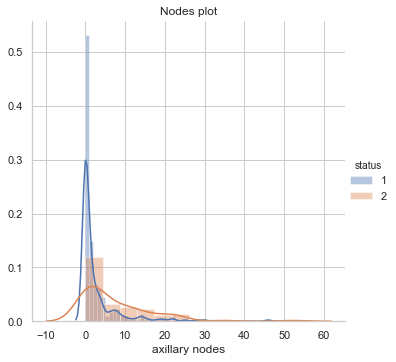

In [14]:
sns.FacetGrid(hb,hue="status",height = 5)\
    .map(sns.distplot,"axillary nodes")\
    .add_legend()
plt.title('Nodes plot')
plt.show();

The graph for those with survival status of more than 5 years is peaky where as that for those not surviving for 5 years is more spread.It can be roughly assumed that those with 0 nodes are more likely to survive for more than 5 years.

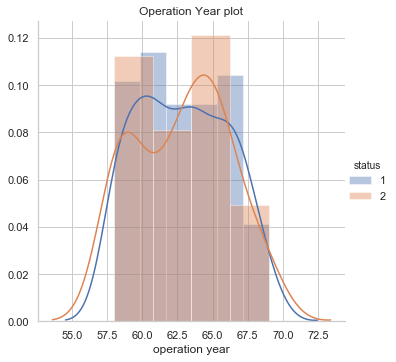

In [15]:
sns.FacetGrid(hb,hue="status",height = 5)\
    .map(sns.distplot,"operation year")\
    .add_legend()
plt.title('Operation Year plot')
plt.show();

An observation can be made form this that the patients diagnosed in year 1962 to 1966 had less chances of survival.
Also, the people tested in year 1958 to 1961 are more likely to recover within 5 years.

This is somewhat contradicting as with increase in time the diagnosis could have been more efficient & more patients should have survived in the later years.

The feature operation year gives no info on the survival status.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


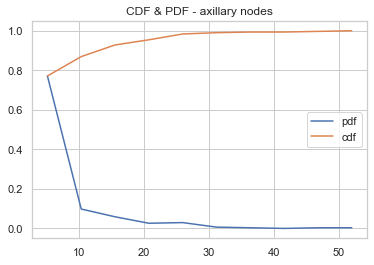

In [13]:
# Here we plot a CDF & PDF for the axillary nodes

counts, bin_edges = np.histogram(hb['axillary nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('CDF & PDF - axillary nodes')
plt.plot(bin_edges[1:],pdf,label ='pdf');
plt.plot(bin_edges[1:], cdf,label = 'cdf');
plt.legend()

It shows that around 80 % of the patients treated have the no of nodes less than 10.But with this we also need to analyse for those surviving more than 5 & not surviving class labels seperately so as to find any pattern in ref. to this .


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


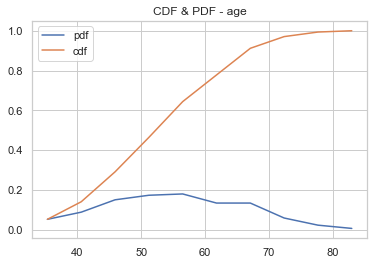

In [17]:
# CDF for age

counts, bin_edges = np.histogram(hb['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('CDF & PDF - age')
plt.plot(bin_edges[1:],pdf,label = 'pdf');
plt.plot(bin_edges[1:], cdf,label ='cdf')
plt.legend()

In [18]:
# Here using lambda functions we convert the values of our labels from numerical to string value
hb['status'] = hb['status'].apply(lambda x: 'long' if x == 1 else 'short')

# we separate the patients as : survived = surviving for more than 5 years('long') & not_survived: couldn't survive for 5 years ('short')

survived = hb.loc[hb["status"] == "long"];
not_survived = hb.loc[hb["status"] == "short"];

### PDF & CDF for those who survived more than 5 Years

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


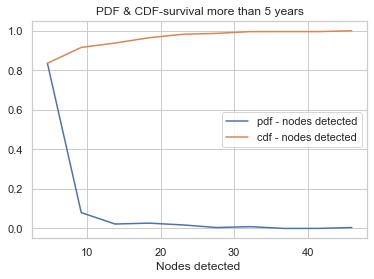

In [19]:
counts, bin_edges = np.histogram(survived['axillary nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf,label = "pdf - nodes detected");
plt.plot(bin_edges[1:], cdf,label = "cdf - nodes detected");
plt.xlabel("Nodes detected ")
plt.title('PDF & CDF-survival more than 5 years')
plt.legend()
plt.show()

From the above plot we can see that those with less than 10 nodes detected are the most likely to survive for more than 5 years. 
For any conclusions on this we also need to analyse the PDF & CDF for those who survived less than 5 Years.

### PDF & CDF for those who survived less than 5 Years

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


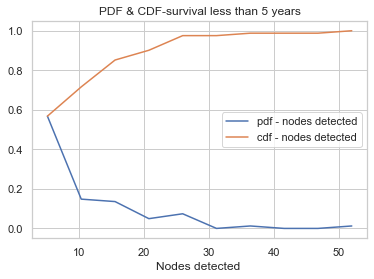

In [20]:
counts, bin_edges = np.histogram(not_survived['axillary nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = "pdf - nodes detected");
plt.plot(bin_edges[1:], cdf,label = "cdf - nodes detected");
plt.xlabel("Nodes detected ")
plt.title('PDF & CDF-survival less than 5 years')
plt.legend()
plt.show()

From the above plot it can be seen that 90 % of those who couldn't survive have less than 20 nodes.

There is a relation between the nodes & survival chances for the patients but we need further analyse for this

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


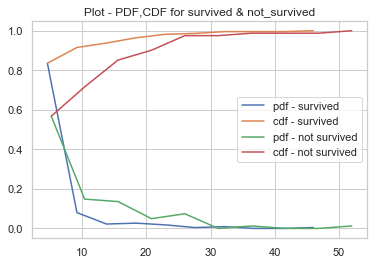

In [18]:
# Plots of PDF,CDF of axillary nodes for survival status.

#survived
counts, bin_edges = np.histogram(survived['axillary nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "pdf - survived")
plt.plot(bin_edges[1:], cdf,label = "cdf - survived")

#not-survived
counts, bin_edges = np.histogram(not_survived['axillary nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('Plot - PDF,CDF for survived & not_survived')
plt.plot(bin_edges[1:],pdf,label = "pdf - not survived")
plt.plot(bin_edges[1:], cdf,label = "cdf - not survived")
plt.legend()

In [19]:
print("Patient surviving 5 or more than 5 years :")
print('Mean axillary nodes =' ,np.mean(survived["axillary nodes"]),'  | Std-dev =',np.std(survived["axillary nodes"]))


print("\nPatients died within 5 years :")
print('Mean axillary nodes =' ,np.mean(not_survived["axillary nodes"]),'  | Std-dev =',np.std(not_survived["axillary nodes"]))
 

Patient surviving 5 or more than 5 years :
Mean axillary nodes = 2.7911111111111113   | Std-dev = 5.857258449412131

Patients died within 5 years :
Mean axillary nodes = 7.45679012345679   | Std-dev = 9.128776076761632


Surviving patients have an avg of 2 .79 nodes & the non-surviving have an avg. of 7.45 nodes.This means that the less the no of nodes more are the chances of survival

## Box plots

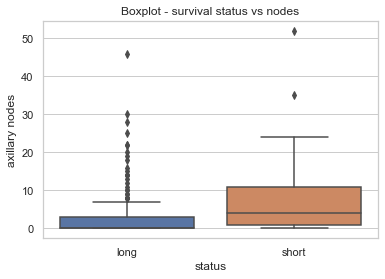

In [21]:
sns.boxplot(x='status',y='axillary nodes', data=hb)
plt.title('Boxplot - survival status vs nodes')
plt.show()

The box-plots also give an indication thhat the patients with more no of axillary nodes are more likely to die


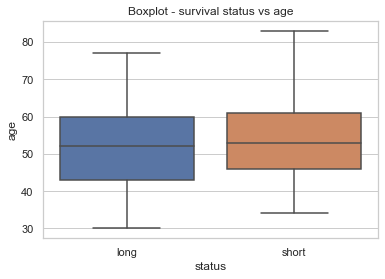

In [22]:
#checking for effect of age on the survival status
sns.boxplot(x='status',y='age', data=hb)
plt.title('Boxplot - survival status vs age')
plt.show()

Its obseserved : patients with age less than 35 are more likely to survive,and those with age above 75 have very less chances of survival.

## Violin plots

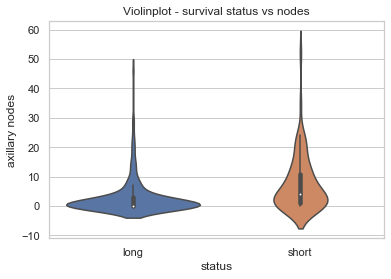

In [23]:
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x='status',y='axillary nodes', data=hb, size=8)
plt.title('Violinplot - survival status vs nodes')
plt.show()

From the above violin-plots we can observe that the patients with 0 nodes have high chances of survival,as the plot of those survived(long) is thick at this value.

## Final Conclusions from the Exploratory Data Analysis on Habermans dataset

##### From all the above analysis we can put conclusions as follows:

* In the data set we have the mean age is 52 ,indicates this the average age to have the cancer surgery for patients.
* Also in ref. to the standard deviation of 10 means at age 40-60 people are more at risk of breast cancer.
* The data is collected from people operated in 1958 - 1969 & of age group 30 - 83 years.
* An assumption can be made that those patients with 0 nodes are more likely to survive & majority of the patients have less than 10 nodes.
* It's quite rare for a patient to have more than 30 nodes
* Patients in age group 30 to 40 are more likely to survive

* The graph for those with survival status of more than 5 years is peaky where as that for those not surviving for 5 years is more spread.It can be roughly   assumed that those with 0 nodes are more likely to survive for more than 5 years.
* The box-plots also give an indication that the patients with more no of axillary nodes are more likely to die
* From the violin-plots we can observe that the patients with 0 nodes have high chances of survival.

###### The features importance can be concluded as below:

- The most important feature for determination of survival status is no of axillary nodes

- Also, age can be considered as an important feature as in the scatter plot the age group 30-40 is more likely to survive & also from the box plot it seems that the patients with age less than 35 are more likely to survive and those with age above 75 have very less chances of survival.

- The year of operation doesn't has any effect on the survival status of the patients.

  -